In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.append("../") 

In [33]:
from algos.nested import *
from algos.greedy import *
from algos.random_order import *
from utils import *
from base import *

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [8]:
filename = "../data/c_memorable_moments.txt"

In [17]:
def get_score(ss_idx):
    ss = Slideshow()
    [ss.add_right(SLIDES[s]) for s in ss_idx]
    return sum(ss.scores)

@timeit
def mean_scores(n, sol):
    scores = []
    for i in range(30):
        ss = sol.run(n, verbose=0)
        score = np.sum(ss.scores)
        scores.append(score)
    return np.mean(scores), scores


sol = NestedMCSolution(filename, max_slides=50, max_candidates=3)

1000 photos caught.
func:'form_slides' took: 0.0083 sec
Num slides : 750


In [18]:
params = {}
a, b = mean_scores(0, sol)
params.update({0: b})
print("Score for n=0 :", a, b)

a, b = mean_scores(1, sol)
params.update({1: b})
print("Score for n=1 :", a, b)

a, b = mean_scores(2, sol)
params.update({2: b})
print("Score for n=2 :", a, b)

a, b = mean_scores(3, sol)
params.update({3: b})
print("Score for n=3 :", a, b)

func:'mean_scores' took: 0.0156 sec
Score for n=0 : 8.333333333333334 [8, 11, 4, 6, 7, 12, 8, 12, 14, 7, 4, 9, 9, 10, 11, 7, 11, 5, 8, 7, 6, 9, 6, 10, 8, 9, 5, 11, 9, 7]
func:'mean_scores' took: 0.7483 sec
Score for n=1 : 18.066666666666666 [17, 14, 16, 19, 14, 21, 16, 25, 16, 17, 19, 17, 19, 20, 19, 16, 16, 20, 15, 20, 19, 19, 15, 18, 19, 16, 25, 22, 16, 17]
func:'mean_scores' took: 35.3817 sec
Score for n=2 : 26.933333333333334 [29, 24, 29, 30, 27, 30, 30, 26, 26, 29, 29, 30, 26, 27, 27, 25, 32, 28, 25, 24, 25, 25, 24, 27, 26, 25, 25, 26, 27, 25]
func:'mean_scores' took: 1516.4020 sec
Score for n=3 : 32.266666666666666 [31, 32, 31, 30, 31, 33, 33, 32, 32, 35, 31, 31, 32, 33, 31, 35, 32, 37, 35, 31, 30, 32, 32, 32, 31, 34, 31, 33, 34, 31]


In [19]:
df = pd.DataFrame(params)

In [20]:
import seaborn as sns

In [25]:
greedy = GreedySolution()
photos = load_data(filename)
slides = greedy.form_slides(photos)[:50]
print(f'Num slides : {len(slides)}')
slideshow = greedy.create_slideshow(slides, max_candidates=3)
greedy_score = score_slideshow(slideshow)
print(f'Score : {greedy_score}')

Bar desc: 100%|█████████████████████████████████████████████████████████████████████| 49/49 [00:00<00:00, 46709.29it/s]

1000 photos caught.
func:'form_slides' took: 0.0073 sec
Num slides : 50
Num random : 0/50
func:'create_slideshow' took: 0.0094 sec
Score : 19


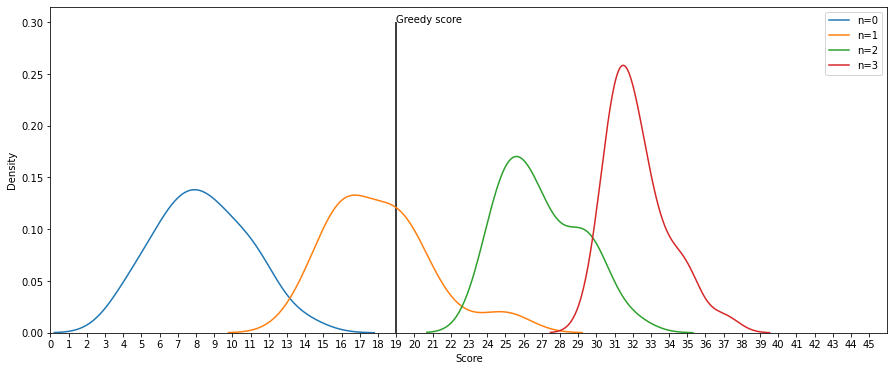

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(15, 6))
ax.set_xlim(0, 46)
sns.kdeplot(data=df, x=0, ax=ax, label=f'n=0')
sns.kdeplot(data=df, x=1, ax=ax, label=f'n=1')
sns.kdeplot(data=df, x=2, ax=ax, label=f'n=2')
sns.kdeplot(data=df, x=3, ax=ax, label=f'n=3')
ax.set_xticks(range(0, 46))
ax.set_xlabel('Score')

ax.vlines(x=greedy_score, ymin=0, ymax=0.3, color='black')
ax.text(greedy_score, 0.3, 'Greedy score')
ax.legend();